## 使用 CNN 做人臉識別

### 撰寫網路爬蟲取得圖片資料

In [2]:
import requests
res = requests.get('https://www.chinatimes.com/realtimenews/20190115005089-260404')
res

<Response [200]>

In [4]:
#res.text

In [5]:
url = 'https://pgw.udn.com.tw/gw/photo.php?u=https://uc.udn.com.tw/photo/2018/11/25/1/5581159.jpg&x=0&y=0&sw=0&sh=0&sl=W&fw=1050&exp=3600'
res = requests.get(url)
res

<Response [200]>

In [6]:
with open('chiling.jpg', 'wb') as f:
    f.write(res.content)

In [9]:
import requests
from bs4 import BeautifulSoup
res  = requests.get('https://www.google.com/search?ei=1ZaVXJDSBa6Rr7wP9p-xuA8&yv=3&tbm=isch&q=%E6%9E%97%E5%BF%97%E7%8E%B2&vet=10ahUKEwjQkJTmmJfhAhWuyIsBHfZPDPcQuT0IogEoAQ.1ZaVXJDSBa6Rr7wP9p-xuA8.i&ved=0ahUKEwjQkJTmmJfhAhWuyIsBHfZPDPcQuT0IogEoAQ&ijn=1&start=100&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc')
soup = BeautifulSoup(res.text, 'lxml')
#soup.select('img')

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [12]:
for rec in soup.select('img'):
    print(rec.get('src'))

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPbJ_ik29N84a9-Ha_UKReNSSIboFuPujREebJ4e7f668fXjCY
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSWX7JEFgJOk75lOUGoWr9oz2rh2M6BuHQza7OovSzXrLgSzxGa
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQS47h49XG_9GSxj2IHd77hkZj8v5UbrsLYHk-fS-AvhvO5cef-
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcROIEbru-fmUtv6vSrVjisnKAMwFgOFFH2Fw8mtesDUmOPBVHAUqg
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRRC4LcQpj42AiY1Yx9HRTjPzTKeeX8zhqpf8_QJGE5_bG9-fkT
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTMyID85fMSI8twZk3cqpcXUDrXHBUNEw_lvLanQiimJzGI7Xkc
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQYA6ItyGNwPhn0uBPQjQ1jOUswuoCAj3DERWA1PHdvvLjlKQy-
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSFMPMfrtbyVdrIgSgc93VU20cpyAS1n11MDjgJUbOSoYFQDHUXtw
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSJXeewCJPWh-54SOFr_tzSnDIY43Otfe0vwUem90YYjLVe92Tf
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd

In [13]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPbJ_ik29N84a9-Ha_UKReNSSIboFuPujREebJ4e7f668fXjCY'
res = requests.get(url)
with open('1.jpg', 'wb') as f:
    f.write(res.content)

In [14]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPbJ_ik29N84a9-Ha_UKReNSSIboFuPujREebJ4e7f668fXjCY'
res = requests.get(url)
fname = url.split('tbn:')[1]
with open('{}.jpg'.format(fname), 'wb') as f:
    f.write(res.content)

In [22]:
import requests
from bs4 import BeautifulSoup
url  = 'https://www.google.com/search?ei=1ZaVXJDSBa6Rr7wP9p-xuA8&yv=3&tbm=isch&q={}&vet=10ahUKEwjQkJTmmJfhAhWuyIsBHfZPDPcQuT0IogEoAQ.1ZaVXJDSBa6Rr7wP9p-xuA8.i&ved=0ahUKEwjQkJTmmJfhAhWuyIsBHfZPDPcQuT0IogEoAQ&ijn=1&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc'
idolname = '金城武'
startpos = 0
res  = requests.get(url.format(idolname, startpos))
soup = BeautifulSoup(res.text, 'lxml')
for rec in soup.select('img'):
    #print(rec)
    if rec.get('src'):
        imgurl = rec.get('src')
    elif rec.get('data-src'):
        imgurl = rec.get('data-src')
    res   = requests.get(imgurl)
    fname = imgurl.split('tbn:')[1]
    with open('{}.jpg'.format(fname), 'wb') as f:
        f.write(res.content)

In [24]:
import requests
from bs4 import BeautifulSoup
import os

def getIdolPicture(idolname, pages, dest):
    # Create new destination directory
    if not os.path.exists(dest):
        os.mkdir(dest)
    url  = 'https://www.google.com/search?ei=1ZaVXJDSBa6Rr7wP9p-xuA8&yv=3&tbm=isch&q={}&vet=10ahUKEwjQkJTmmJfhAhWuyIsBHfZPDPcQuT0IogEoAQ.1ZaVXJDSBa6Rr7wP9p-xuA8.i&ved=0ahUKEwjQkJTmmJfhAhWuyIsBHfZPDPcQuT0IogEoAQ&ijn=1&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc'
    # change page
    for i in range(pages):
        startpos = i * 100
        # get page info
        res  = requests.get(url.format(idolname, startpos))
        soup = BeautifulSoup(res.text, 'lxml')
        # get picture
        for rec in soup.select('img'):
            #print(rec)
            if rec.get('src'):
                imgurl = rec.get('src')
            elif rec.get('data-src'):
                imgurl = rec.get('data-src')
            res   = requests.get(imgurl)
            fname = imgurl.split('tbn:')[1]
            with open('{}/{}.jpg'.format(dest,fname), 'wb') as f:
                f.write(res.content)

In [27]:
getIdolPicture('林志玲', 3, 'chiling')

In [28]:
getIdolPicture('周子瑜', 3, 'tzuyu')

In [29]:
getIdolPicture('徐若瑄', 3, 'vivian')

###  使用Opencv 截取人臉
- https://download.lfd.uci.edu/pythonlibs/u2hcgva4/opencv_python-3.4.5-cp36-cp36m-win_amd64.whl
- ! pip install opencv_python-3.4.5-cp36-cp36m-win_amd64.whl

### Haar cascade
- https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

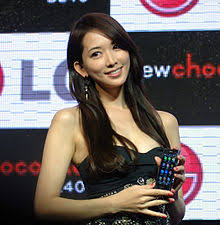

In [53]:
from PIL import Image
im = Image.open('chiling/ANd9GcQ0cZH9Ij5j_hbrIAxSEJiWgsTdBBuJsLwcvkN4ZshFmTj34pX51w.jpg')
im

In [32]:
import cv2 as cv
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv.imread('chiling/ANd9GcQ0cZH9Ij5j_hbrIAxSEJiWgsTdBBuJsLwcvkN4ZshFmTj34pX51w.jpg')
img.shape

(225, 220, 3)

In [36]:
?face_cascade.detectMultiScale

In [46]:
faces = face_cascade.detectMultiScale(img, 1.1, 1)

In [47]:
faces

array([[80, 30, 55, 55]], dtype=int32)

In [49]:
x,y,w,h = faces[0]

In [50]:
box = (x, y, x+w, y+h)

In [54]:
crpim = im.crop(box).resize((64,64))

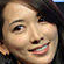

In [56]:
crpim

In [57]:
import cv2 as cv
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv.imread('chiling/ANd9GcRCmpPlP3fPUKlA10tc7UEwjF8rdnsXOpb12rJZitnCVx6sbjSt.jpg')
img.shape

(168, 300, 3)

In [58]:
faces = face_cascade.detectMultiScale(img, 1.1, 1)

In [59]:
faces

array([[12, 16, 52, 52],
       [71, 29, 78, 78]], dtype=int32)

In [60]:
len(faces)

2

In [64]:
src  = 'chiling/'
dest = 'chiling_face/'
if not os.path.exists(dest):
    os.mkdir(dest)
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

for filename in os.listdir(src):
    #print(src + filename)
    img = cv.imread(src + filename)
    faces = face_cascade.detectMultiScale(img, 1.1, 1)
    if len(faces) == 1:
        im      = Image.open(src + filename)
        x,y,w,h = faces[0]
        box     = (x, y, x+w, y+h)
        crpim   = im.crop(box).resize((64,64))
        crpim.save(dest + filename)

In [65]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

def cropIdolFace(src, dest):
    if not os.path.exists(dest):
        os.mkdir(dest)
    for filename in os.listdir(src):
        img = cv.imread(src + filename)
        faces = face_cascade.detectMultiScale(img, 1.1, 1)
        if len(faces) == 1:
            im      = Image.open(src + filename)
            x,y,w,h = faces[0]
            box     = (x, y, x+w, y+h)
            crpim   = im.crop(box).resize((64,64))
            crpim.save(dest + filename)

In [ ]:
cropIdolFace('chiling/', 'chiling_face/')

In [66]:
cropIdolFace('tzuyu/', 'tzuyu_face/')

In [67]:
cropIdolFace('vivian/', 'vivian_face/')

### 建構卷積神經網路(CNN)

In [75]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64,
3), activation = 'relu',padding = 'same'))
# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu',padding = 'same'))
# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Flattening
classifier.add(Flatten())

# Fully Connected
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 
classifier.add(Dense(units = 3, activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                        loss ='categorical_crossentropy', 
                     metrics = ['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [76]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

### 圖像增廣技術

In [77]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,     #x坐标保持不变，而对应的y坐标按比例发生平移
                                   zoom_range = 0.2,      #可以让图片在长或宽的方向进行放大
                                   horizontal_flip = True #水平翻转操作
                                  )

In [78]:
test_datagen = ImageDataGenerator(rescale = 1./255)

### 將資料分為訓練與測試資料集

In [86]:
import os
if not os.path.exists('train/'):
    os.mkdir('train/')
if not os.path.exists('test/'):
    os.mkdir('test/')

In [80]:
import os
len(list(os.listdir('chiling_face/')))
dataset = list(os.listdir('chiling_face/'))

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(dataset, test_size= 0.2, random_state = 42)

In [82]:
len(train_data)

109

In [83]:
len(test_data)

28

In [87]:
if not os.path.exists('train/chiling_face/'):
    os.mkdir('train/chiling_face/')
if not os.path.exists('test/chiling_face/'):
    os.mkdir('test/chiling_face/')
    
for f in train_data:
    os.rename('chiling_face/' + f, 'train/chiling_face/' + f)
for f in test_data:
    os.rename('chiling_face/' + f, 'test/chiling_face/' + f)

In [88]:
import os
from sklearn.model_selection import train_test_split

def splitDataset(dirs):
    dataset = list(os.listdir(dirs))
    train_data, test_data = train_test_split(dataset, test_size= 0.2, random_state = 42)
    
    if not os.path.exists('train/'+dirs):
        os.mkdir('train/'+dirs)
    if not os.path.exists('test/'+dirs):
        os.mkdir('test/'+dirs)

    for f in train_data:
        os.rename(dirs + f, 'train/'+ dirs + f)
    for f in test_data:
        os.rename(dirs + f, 'test/' + dirs +f)

In [89]:
splitDataset('chiling_face/')

In [90]:
splitDataset('tzuyu_face/')

In [91]:
splitDataset('vivian_face/')

In [92]:
training_set = train_datagen.flow_from_directory(
    'train/', target_size = (64, 64),
     batch_size = 30,
     class_mode = 'categorical')

Found 355 images belonging to 3 classes.


In [93]:
test_set = test_datagen.flow_from_directory(
    'test/', target_size = (64, 64),
    batch_size = 30, 
    class_mode = 'categorical')

Found 91 images belonging to 3 classes.


### 訓練神經網路

In [102]:
history = classifier.fit_generator(training_set,
                         nb_epoch=10,
                         nb_val_samples=30,
                         steps_per_epoch = 30,
                         verbose = 1,
                         validation_data = test_set)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=30, verbose=1, validation_data=<keras_pre..., epochs=10, validation_steps=30)`
  


Epoch 1/10
30/30 [==============================] - 6s 185ms/step - loss: 0.0208 - acc: 0.9889 - val_loss: 2.2769 - val_acc: 0.7515
Epoch 2/10
30/30 [==============================] - 5s 169ms/step - loss: 0.0208 - acc: 0.9933 - val_loss: 2.1997 - val_acc: 0.7245
Epoch 3/10
30/30 [==============================] - 5s 156ms/step - loss: 0.0163 - acc: 0.9931 - val_loss: 2.1510 - val_acc: 0.7560
Epoch 4/10
30/30 [==============================] - 5s 158ms/step - loss: 0.0269 - acc: 0.9911 - val_loss: 2.2657 - val_acc: 0.7245
Epoch 5/10
30/30 [==============================] - 5s 161ms/step - loss: 0.0208 - acc: 0.9911 - val_loss: 2.0672 - val_acc: 0.7590
Epoch 6/10
30/30 [==============================] - 5s 158ms/step - loss: 0.0362 - acc: 0.9889 - val_loss: 2.1461 - val_acc: 0.7030
Epoch 7/10
30/30 [==============================] - 5s 168ms/step - loss: 0.0333 - acc: 0.9878 - val_loss: 1.9148 - val_acc: 0.7605
Epoch 8/10
30/30 [==============================] - 5s 171ms/step - loss: 0.

### 使用模型分類圖片

In [145]:
import cv2 as cv
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv.imread('predict.jpg')
img.shape

(768, 1366, 3)

In [146]:
faces = face_cascade.detectMultiScale(img, 1.5, 1)

In [147]:
faces

array([[632, 303, 273, 273],
       [444, 148,  81,  81]], dtype=int32)

In [148]:
im = Image.open('predict.jpg')
x,y,w,h = faces[0]
box     = (x, y, x+w, y+h)
crpim   = im.crop(box).resize((64,64))
crpim.save('predict_face.jpg')

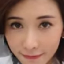

In [149]:
crpim

In [150]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('predict_face.jpg', target_size= (64,64))
test_image = image.img_to_array(test_image)
test_image.shape

(64, 64, 3)

In [151]:
test_image = np.expand_dims(test_image, axis = 0)
test_image.shape

(1, 64, 64, 3)

In [152]:
classifier.predict_classes(test_image)

array([0], dtype=int64)

In [153]:
training_set.class_indices

{'chiling_face': 0, 'tzuyu_face': 1, 'vivian_face': 2}

### Rename

In [154]:
import os
os.rename('1.jpg','1_test.jpg')

In [155]:
os.mkdir('tmp')

In [157]:
os.rename('1_test.jpg', 'tmp/1_test.jpg')

FileNotFoundError: [WinError 2] 系統找不到指定的檔案。: '1_test.jpg' -> 'tmp/1_test.jpg'

In [158]:
import shutil
shutil.copy('tmp/1_test.jpg','1_test.jpg')

'1_test.jpg'

## 語音辨識
- https://github.com/ywchiu/tibamedl/blob/master/CNN/Speech%20Recognition%20With%20Keras.ipyn

### 安裝librosa

In [159]:
! pip install librosa

  Running setup.py bdist_wheel for librosa: started
  Running setup.py bdist_wheel for librosa: finished with status 'done'
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\ce\49\68\87ba660f30e3977f0778e39ee2e944629cd37c2a0ce41f9ff1
  Running setup.py bdist_wheel for audioread: started
  Running setup.py bdist_wheel for audioread: finished with status 'done'
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\53\02\90\7b5c4081b7470c550ab605f600bad237dde12a6b8999b11f50
  Running setup.py bdist_wheel for resampy: started
  Running setup.py bdist_wheel for resampy: finished with status 'done'
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\ff\4f\ed\2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
Successfully built librosa audioread resampy


distributed 1.21.8 requires msgpack, which is not installed.
tensorflow 1.13.1 has requirement tensorboard<1.14.0,>=1.13.0, but you'll have tensorboard 1.12.2 which is incompatible.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [161]:
! pip install tqdm

distributed 1.21.8 requires msgpack, which is not installed.
tensorflow 1.13.1 has requirement tensorboard<1.14.0,>=1.13.0, but you'll have tensorboard 1.12.2 which is incompatible.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [162]:
import librosa
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np
from tqdm import tqdm

In [164]:
def get_labels(path='data'):
    labels = os.listdir(path)
    label_indices = np.arange(0, len(labels))
    return labels, label_indices, to_categorical(label_indices)

In [165]:
wave, sr = librosa.load('data/cat/00b01445_nohash_0.wav', mono=True, sr=None)

In [167]:
wave.shape

(16000,)

In [168]:
mfcc = librosa.feature.mfcc(wave, sr=16000)

In [170]:
mfcc.shape

(20, 32)

In [171]:
def wav2mfcc(file_path, max_len=11):
    wave, sr = librosa.load(file_path, mono=True, sr=None)
    wave = wave[::3]
    mfcc = librosa.feature.mfcc(wave, sr=16000)

    # If maximum length exceeds mfcc lengths then pad the remaining ones
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')

    # Else cutoff the remaining parts
    else:
        mfcc = mfcc[:, :max_len]
    
    return mfcc

In [173]:
def save_data_to_array(path='data', max_len=11):
    labels, _, _ = get_labels(path)

    for label in labels:
        # Init mfcc vectors
        mfcc_vectors = []

        wavfiles = [path + label + '/' + wavfile for wavfile in os.listdir(path + '/' + label)]
        for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format(label)):
            mfcc = wav2mfcc(wavfile, max_len=max_len)
            mfcc_vectors.append(mfcc)
        np.save(label + '.npy', mfcc_vectors)

### 準備訓練與測試資料集

In [194]:
def get_train_test(split_ratio=0.6, random_state=42):
    # Get available labels
    labels, indices, _ = get_labels(DATA_PATH)
    print(labels)
    # Getting first arrays
    X = np.load(DATA_PATH + labels[0]   )
    y = np.zeros(X.shape[0])

    # Append all of the dataset into one single array, same goes for y
    for i, label in enumerate(labels[1:]):
        x = np.load(DATA_PATH + label )
        X = np.vstack((X, x))
        y = np.append(y, np.full(x.shape[0], fill_value= (i + 1)))

    assert X.shape[0] == len(y)

    return train_test_split(X, y, test_size= (1 - split_ratio), random_state=random_state, shuffle=True)

In [195]:
def prepare_dataset(path='data'):
    labels, _, _ = get_labels(path)
    data = {}
    for label in labels:
        data[label] = {}
        data[label]['path'] = [path  + label + '/' + wavfile for wavfile in os.listdir(path + '/' + label)]

        vectors = []

        for wavfile in data[label]['path']:
            wave, sr = librosa.load(wavfile, mono=True, sr=None)
            # Downsampling
            wave = wave[::3]
            mfcc = librosa.feature.mfcc(wave, sr=16000)
            vectors.append(mfcc)

        data[label]['mfcc'] = vectors

    return data

In [196]:
def load_dataset(path='data'):
    data = prepare_dataset(path)

    dataset = []

    for key in data:
        for mfcc in data[key]['mfcc']:
            dataset.append((key, mfcc))

    return dataset[:100]

In [202]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

DATA_PATH = "./data/"
# Second dimension of the feature is dim2
feature_dim_2 = 11

# Save data to array file first
# save_data_to_array(max_len=feature_dim_2)

# # Loading train set and test set
X_train, X_test, y_train, y_test = get_train_test()

['bed.npy', 'cat.npy', 'happy.npy']


In [203]:
X_train.shape

(3112, 20, 11)

In [204]:
# # Feature dimension
feature_dim_1 = 20
channel = 1
epochs = 10
batch_size = 100
num_classes = 3

# Reshaping to perform 2D convolution
X_train = X_train.reshape(X_train.shape[0], feature_dim_1, feature_dim_2, channel)
X_test = X_test.reshape(X_test.shape[0], feature_dim_1, feature_dim_2, channel)

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

In [206]:
X_train.shape

(3112, 20, 11, 1)

In [208]:
y_train_hot.shape

(3112, 3)

In [209]:
model = Sequential()
# convolution
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(feature_dim_1, feature_dim_2, channel)))
model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
model.add(Conv2D(120, kernel_size=(2, 2), activation='relu'))

# mat pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flattening
model.add(Flatten())

# fully connected
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

In [210]:
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [211]:
model.fit(X_train, y_train_hot, 
          batch_size=batch_size, 
          epochs=epochs, 
          verbose=1, 
          validation_data=(X_test, y_test_hot))

Train on 3112 samples, validate on 2076 samples
Epoch 1/10
3112/3112 [==============================] - ETA: 15s - loss: 6.1586 - acc: 0.34 - ETA: 8s - loss: 4.6280 - acc: 0.3400 - ETA: 6s - loss: 4.0750 - acc: 0.343 - ETA: 5s - loss: 3.6948 - acc: 0.342 - ETA: 4s - loss: 3.4185 - acc: 0.350 - ETA: 3s - loss: 3.2105 - acc: 0.351 - ETA: 3s - loss: 2.9652 - acc: 0.358 - ETA: 3s - loss: 2.7868 - acc: 0.356 - ETA: 2s - loss: 2.6646 - acc: 0.350 - ETA: 2s - loss: 2.5398 - acc: 0.350 - ETA: 2s - loss: 2.4260 - acc: 0.350 - ETA: 2s - loss: 2.3417 - acc: 0.350 - ETA: 2s - loss: 2.2612 - acc: 0.353 - ETA: 1s - loss: 2.1839 - acc: 0.355 - ETA: 1s - loss: 2.1210 - acc: 0.354 - ETA: 1s - loss: 2.0678 - acc: 0.356 - ETA: 1s - loss: 2.0163 - acc: 0.362 - ETA: 1s - loss: 1.9714 - acc: 0.362 - ETA: 1s - loss: 1.9296 - acc: 0.361 - ETA: 1s - loss: 1.8855 - acc: 0.365 - ETA: 1s - loss: 1.8462 - acc: 0.368 - ETA: 0s - loss: 1.8122 - acc: 0.371 - ETA: 0s - loss: 1.7785 - acc: 0.373 - ETA: 0s - loss: 1.748

In [212]:
# Predicts one sample
def predict(filepath, model):
    sample = wav2mfcc(filepath)
    sample_reshaped = sample.reshape(1, feature_dim_1, feature_dim_2, channel)
    return get_labels()[0][
            np.argmax(model.predict(sample_reshaped))
    ]

In [213]:
predict('0ab3b47d_nohash_0.wav', model)

'happy.npy'

## 使用遞歸神經網路預測股票

### 使用Pandas DataReader
- ! pip install pandas-datareader

In [214]:
! pip install pandas-datareader

distributed 1.21.8 requires msgpack, which is not installed.
tensorflow 1.13.1 has requirement tensorboard<1.14.0,>=1.13.0, but you'll have tensorboard 1.12.2 which is incompatible.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import pandas_datareader
dataset = pandas_datareader.get_data_yahoo('2330.TW')

In [2]:
dataset.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-18,241.0,239.0,239.5,241.0,26856532.0,241.0
2019-03-19,240.5,238.0,239.0,240.5,14479009.0,240.5
2019-03-20,242.0,239.5,242.0,242.0,22975971.0,242.0
2019-03-21,245.5,241.0,242.5,245.5,26179502.0,245.5
2019-03-22,248.5,244.5,248.0,248.5,22931467.0,248.5


Populating the interactive namespace from numpy and matplotlib


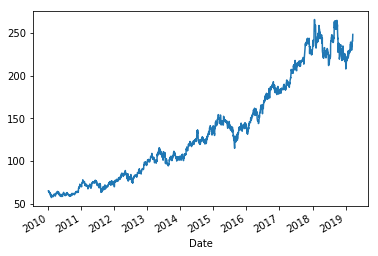

In [3]:
%pylab inline
dataset['Close'].plot(kind = 'line')

In [4]:
dataset['Close'].count()

2263

In [5]:
2263 * 0.8

1810.4

In [6]:
trainset = dataset.iloc[0:1800,3:4]

In [7]:
testset  = dataset.iloc[1800:,3:4]

In [8]:
len(trainset)

1800

In [9]:
len(testset)

463

In [10]:
trainset.shape

(1800, 1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(trainset)

In [12]:
training_set_scaled

array([[0.05587809],
       [0.05297532],
       [0.05587809],
       ...,
       [0.97097242],
       [0.98548621],
       [0.99637155]])

In [13]:
import numpy as np
X_train = []
y_train = []
for i in range(60, 1800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [14]:
X_train.shape

(1740, 60)

In [15]:
y_train.shape

(1740,)

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [17]:
X_train.shape

(1740, 60, 1)

In [18]:
# Importing the Keras libraries and packages
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
1740/1740 [==============================] - 7s 4ms/step - loss: 0.0014
Epoch 2/10
1740/1740 [==============================] - 5s 3ms/step - loss: 0.0010
Epoch 3/10
1740/1740 [==============================] - 4s 2ms/step - loss: 0.0010
Epoch 4/10
1740/1740 [==============================] - 4s 2ms/step - loss: 0.0010
Epoch 5/10
1740/1740 [==============================] - 4s 2ms/step - loss: 9.6910e-04
Epoch 6/10
1740/1740 [==============================] - 4s 2ms/step - loss: 0.0010
Epoch 7/10
1740/1740 [==============================] - 4s 2ms/step - loss: 9.0556e-04
Epoch 8/10
1740/1740 [==============================] - 4s 2ms/step - loss: 9.6958e-04
Epoch 9/10
1740/1740 [==============================] - 4s 2ms/step - loss: 0.0010
Epoch 10/10
1740/1740 [==============================] - 4s 2ms/step - loss: 9.8868e-04


In [22]:
testset.shape

(463, 1)

In [23]:
test_set_scaled = sc.transform(testset)

In [24]:
import numpy as np
X_test = []
y_test = []
for i in range(60, 463):
    X_test.append(test_set_scaled[i-60:i, 0])
    y_test.append(test_set_scaled[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [25]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [27]:
predicted = regressor.predict(X_test)

In [30]:
predicted = sc.inverse_transform(predicted)

In [34]:
y_test = y_test.reshape((403,1))

In [35]:
stockprice = sc.inverse_transform(y_test)

In [38]:
len(predicted)

403

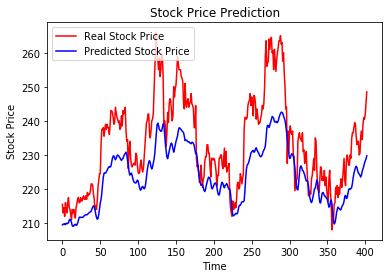

In [36]:
import matplotlib.pyplot as plt
plt.plot(stockprice, color = 'red', label = 'Real Stock Price')
plt.plot(predicted, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [39]:
predicted2 = regressor.predict(X_train)

In [40]:
predicted2 = sc.inverse_transform(predicted2)

In [41]:
y_train.shape

(1740,)

In [42]:
y_train = y_train.reshape((1740,1))

In [43]:
stockprice2 = sc.inverse_transform(y_train)

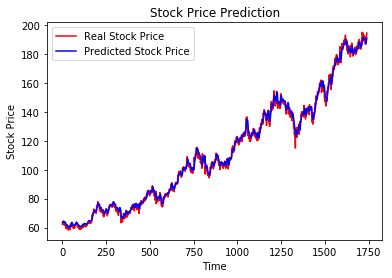

In [44]:
import matplotlib.pyplot as plt
plt.plot(stockprice2, color = 'red', label = 'Real Stock Price')
plt.plot(predicted2, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [47]:
predicted[0]

array([209.49031], dtype=float32)

In [49]:
stockprice[0]

array([215.5])

In [50]:
(215 - 209) / 209

0.028708133971291867

## 多時間序列預測

### 讀取資料

In [51]:
from pandas import read_csv
from datetime import datetime

def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

dataset = read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/pollution.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset.head()

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,,
2010-01-01 00:00:00,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [54]:
#dataset.head(30)

### 資料預處理

In [55]:
dataset.drop('No', axis=1, inplace=True)
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
dataset['pollution'].fillna(0, inplace=True)
dataset = dataset[24:]
dataset.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


### 探索資料

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


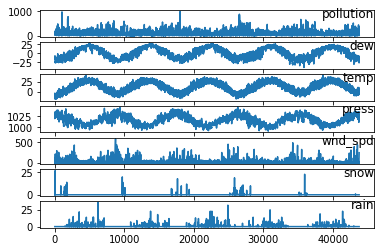

In [56]:
%pylab inline
from matplotlib import pyplot
values = dataset.values

groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

### 資料編碼

In [58]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
values = values.astype('float32')

In [60]:
values[0]

array([ 129.  ,  -16.  ,   -4.  , 1020.  ,    2.  ,    1.79,    0.  ,
          0.  ], dtype=float32)

In [61]:
dataset.head(1)

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02,129.0,-16,-4.0,1020.0,SE,1.79,0,0


### 資料轉換

In [62]:

import pandas
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pandas.DataFrame(data)
	cols, names = list(), list()
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pandas.concat(cols, axis=1)
	agg.columns = names
    
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

### 正規化特徵

In [63]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

In [65]:
reframed.head(1)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.00229,0.0,0.0,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.0,0.0


### 捨棄掉不需要預測的欄位

In [66]:
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
reframed.head(3)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.0,0.0,0.148893
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.0,0.0,0.159960
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.0,0.0,0.182093


### 分為訓練與測試資料集

In [67]:
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X , test_y  = test[:, :-1], test[:, -1]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X  = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((8760, 1, 8), (8760,), (35039, 1, 8), (35039,))

### 建立模型

In [75]:
import keras
from keras import layers

model = keras.models.Sequential()
model.add(layers.LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(layers.Dense(1))
model.compile(loss='mae', optimizer='adam')

### 訓練模型

In [70]:
?model.fit

In [76]:
history = model.fit(train_X, train_y, epochs=50, 
                    batch_size=72, validation_data=(test_X, test_y), 
                    verbose=0, shuffle=False)

### 繪製損失圖

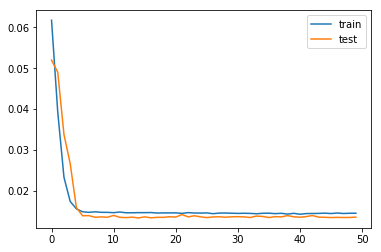

In [77]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### 產生預測

In [78]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [79]:
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [81]:
a = np.array([[0],[20],[40],[60],[100]])
sc = MinMaxScaler(feature_range = (0, 1))
b= sc.fit_transform(a)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [82]:
b

array([[0. ],
       [0.2],
       [0.4],
       [0.6],
       [1. ]])

In [84]:
sc.inverse_transform(b)

array([[  0.],
       [ 20.],
       [ 40.],
       [ 60.],
       [100.]])

### 計算RMSE

In [86]:
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 26.425


In [87]:
inv_y

array([31., 20., 19., ..., 10.,  8., 12.], dtype=float32)

In [88]:
inv_yhat

array([36.211037, 32.447426, 21.856934, ..., 10.210331, 10.205152,
        8.43177 ], dtype=float32)

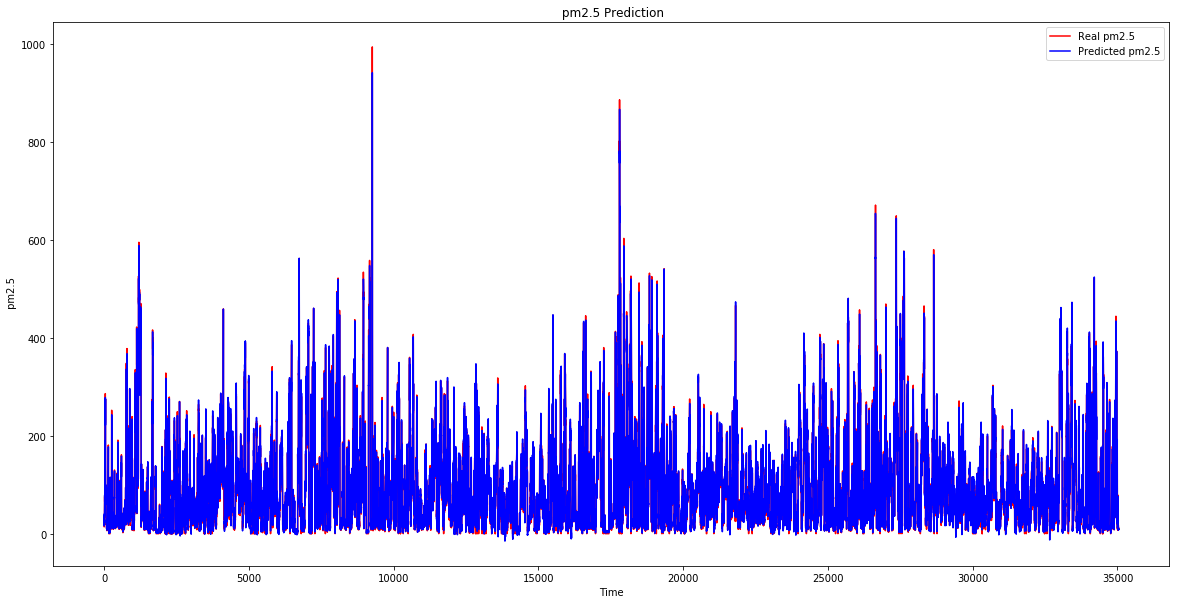

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(inv_y, color = 'red', label = 'Real pm2.5')
plt.plot(inv_yhat, color = 'blue', label = 'Predicted pm2.5')
plt.title(' pm2.5 Prediction')
plt.xlabel('Time')
plt.ylabel(' pm2.5')
plt.legend()
plt.show()

In [91]:
y= np.array([[1],[2],[3]])
y

array([[1],
       [2],
       [3]])

In [92]:
y= np.array([[1,1.1,1.2],[2,2.1,2.2],[3,3.1,3.2]])
y

array([[1. , 1.1, 1.2],
       [2. , 2.1, 2.2],
       [3. , 3.1, 3.2]])

## 讓電腦創作

### 讀取文字資料

In [94]:
import keras
import numpy as np

path = keras.utils.get_file(
    'nietzsche.txt',
    origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
text = open(path, encoding='utf-8').read().lower()
print('Corpus length:', len(text))

Corpus length: 600893


In [97]:
text[0:100]

'preface\n\n\nsupposing that truth is a woman--what then? is there not ground\nfor suspecting that all ph'

In [104]:
s = 'this is an apple'
maxlen = 5
step = 3
sentences, next_chars= [],[]
for i in range(0, len(s) - maxlen, step):
    sentences.append(s[i: i + maxlen])
    next_chars.append(s[i + maxlen])
for i, j in zip(sentences, next_chars):
    print(i,j)

this  i
s is  a
s an  a
n app l


### 將字元向量化

In [105]:
# Vectorizing sequences of characters

# 從文章中取得序列長度
maxlen = 60

# 按步驟數進行隨機採樣
step = 3

# 保留句子的序列
sentences = []

# 保留下一個字元
next_chars = []

for i in range(0, len(text) - maxlen, step):
    # 根據step，每次取出 maxlen 的序列為 train data
    sentences.append(text[i: i + maxlen])
    # 取出序列的下一個字元當 targets
    next_chars.append(text[i + maxlen])
    
print('Number of sequences:', len(sentences))



Number of sequences: 200278


In [107]:
# 產生詞彙表
chars = sorted(list(set(text)))
print('Unique characters:', len(chars))

Unique characters: 57


In [109]:
print(chars)

['\n', ' ', '!', '"', "'", '(', ')', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'ä', 'æ', 'é', 'ë']


In [111]:
# 利用字典對映 char 和索引 index
char_indices = dict((char, chars.index(char)) for char in chars)
print(char_indices)

{'\n': 0, ' ': 1, '!': 2, '"': 3, "'": 4, '(': 5, ')': 6, ',': 7, '-': 8, '.': 9, '0': 10, '1': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18, '9': 19, ':': 20, ';': 21, '=': 22, '?': 23, '[': 24, ']': 25, '_': 26, 'a': 27, 'b': 28, 'c': 29, 'd': 30, 'e': 31, 'f': 32, 'g': 33, 'h': 34, 'i': 35, 'j': 36, 'k': 37, 'l': 38, 'm': 39, 'n': 40, 'o': 41, 'p': 42, 'q': 43, 'r': 44, 's': 45, 't': 46, 'u': 47, 'v': 48, 'w': 49, 'x': 50, 'y': 51, 'z': 52, 'ä': 53, 'æ': 54, 'é': 55, 'ë': 56}


In [114]:
# 使用one-hot 編碼
# x：訓練樣本
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
# y：目標樣本
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)


In [115]:
x.shape

(200278, 60, 57)

In [116]:
y.shape

(200278, 57)

In [117]:
for i, sentence in enumerate(sentences):        # 對每個句子
    for t, char in enumerate(sentence):         # 對每個詞
        x[i, t, char_indices[char]] = 1         # 將訓練樣本做one-hot
    y[i, char_indices[next_chars[i]]] = 1       # 將標籤做one-hot

### 建立LSTM 模型

In [118]:
# 使用 LSTM 做下一個字元的預測

from keras import layers

model = keras.models.Sequential()
# 輸入為60 * 字串長度
model.add(layers.LSTM(128, return_sequences=True, input_shape=(maxlen, len(chars))))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.LSTM(128))
# 以字元對應作為輸出
model.add(layers.Dense(len(chars), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
model.fit(x, y, batch_size=1024, epochs=1)

## 讓電腦自動評論餐廳

### 使用Yelp 模型
- https://github.com/Tony607/Yelp_review_generation/releases/download/V0.1/pre-trained.hdf5

In [122]:
import keras
from keras import layers
import sys
import numpy as np

text= 'this text file can be any text, as long as it contains text longer than maxlen defined below'

chars=['\n', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~']


In [133]:
len(chars)

95

In [123]:
# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)
maxlen=60
step=1


In [124]:
model = keras.models.Sequential()
model.add(layers.LSTM(1024, input_shape=(maxlen, len(chars)),return_sequences=True))
model.add(layers.LSTM(1024, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))
model.load_weights("pre-trained.hdf5")

optimizer = keras.optimizers.Adam(lr=0.0002)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [126]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 60, 1024)          4587520   
_________________________________________________________________
lstm_11 (LSTM)               (None, 1024)              8392704   
_________________________________________________________________
dense_5 (Dense)              (None, 95)                97375     
Total params: 13,077,599
Trainable params: 13,077,599
Non-trainable params: 0
_________________________________________________________________


In [129]:
text='this text file can be any text, as long as it contains text longer than maxlen defined below'
generated_text = text[0:60]

In [130]:
sampled = np.zeros((1, maxlen, len(chars)))
for t, char in enumerate(generated_text):
    sampled[0, t, char_indices[char]] = 1
    
preds = model.predict(sampled, verbose=0)[0]

In [132]:
preds.shape

(95,)

In [134]:
np.argmax(preds)

77

In [136]:
chars[77]

'm'

### 讓電腦自動寫文(產生固定結果)

In [ ]:
start_index = np.random.randint(0, len(text) - maxlen - 1)
generated_text = text[start_index: start_index + maxlen]
sys.stdout.write(generated_text)

for i in range(600):
    sampled = np.zeros((1, maxlen, len(chars)))

    for t, char in enumerate(generated_text):
        sampled[0, t, char_indices[char]] = 1.

    preds = model.predict(sampled, verbose=0)[0]

    next_index = np.argmax(preds)
    next_char = chars[next_index]
    generated_text += next_char
    generated_text = generated_text[1:]
    sys.stdout.write(next_char)
    sys.stdout.flush()

### 讓電腦自動寫文(產生隨機結果)

In [147]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [148]:
preds = np.array([0.1,0.2,0.7,0.3,0.2,0.01])


In [149]:
np.log(preds) / 1

array([-2.30258509, -1.60943791, -0.35667494, -1.2039728 , -1.60943791,
       -4.60517019])

In [150]:
np.log(preds) / 0.5

array([-4.60517019, -3.21887582, -0.71334989, -2.40794561, -3.21887582,
       -9.21034037])

In [151]:
def random_reviews():
    # sample a start index
    start_index = np.random.randint(0, len(text) - maxlen - 1)
    # the initial sampled text with maxlen long
    generated_text = text[start_index: start_index + maxlen]
    print('Coming up with several reviews for you...')

    for temperature in [0.8]:
        sys.stdout.write(generated_text)

        # We generate 600 characters
        for i in range(600):
            sampled = np.zeros((1, maxlen, len(chars)))
            # Turn each char to char index.
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.
            # Predict next char probabilities
            preds = model.predict(sampled, verbose=0)[0]
            # Add some randomness by sampling given probabilities.
            next_index = sample(preds, temperature)
            # Turn char index to char.
            next_char = chars[next_index]
            # Append char to generated text string
            generated_text += next_char
            # Pop the first char in generated text string.
            generated_text = generated_text[1:]
            # Print the new generated char.
            sys.stdout.write(next_char)
            sys.stdout.flush()
        print(generated_text)

In [153]:
random_reviews()

Coming up with several reviews for you...
is text file can be any text, as long as it contains text lol $2 or 2  shots is no joke.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


 Your from the price and the drinks and food it served us 10/10 Happy to have found the real thing!!!!!!<EOR>"
"<SOR>Our waiter, Nick was very entertaining, place was great and a courtyard place with the best wood fired pizza in Vegas.  I also enjoy the Greek salad and chicken pita.  Our server was very attentive and polite and professional. We went late at night and it was excellent great food and drink maintained wicked fast! Sat at the bar and had a great time.  A great experience.<EOR>"
"<SOR>This is a great local spot. The staff are friendly and the food is excgreat local spot. The staff are friendly and the food is exc
